In [1]:
#Dependencies
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

**Daily Chlorophyll concentration 2010-2020 in lon, lat = -75.5 , -45. Golfo de Penas. Chilean Patagonia**

In [3]:
df = pd.read_csv('data/prophet_chl_daily_2010-2020_whales.csv')

In [4]:
df

,ds,y
0,2010-01-01,0.861652
1,2010-01-02,0.805757
2,2010-01-03,0.856557
3,2010-01-04,0.856563
4,2010-01-05,0.739469
...,...,...
4013,2020-12-27,0.603901
4014,2020-12-28,0.639898
4015,2020-12-29,0.967672
4016,2020-12-30,0.967672


#### First model: disabling yearly seasonality

In [5]:
# Train model
m = Prophet(interval_width=0.95, daily_seasonality=True) # confidence interval of 95%
model = m.fit(df) # fit method

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [6]:
# Forecast
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,0.866176,-0.699696,2.180002,0.866176,0.866176,-0.117409,-0.117409,-0.117409,0.019169,...,-0.039375,-0.039375,-0.039375,-0.097202,-0.097202,-0.097202,0.0,0.0,0.0,0.748767
1,2010-01-02,0.865975,-0.671425,2.264174,0.865975,0.865975,-0.070726,-0.070726,-0.070726,0.019169,...,-0.015407,-0.015407,-0.015407,-0.074487,-0.074487,-0.074487,0.0,0.0,0.0,0.795249
2,2010-01-03,0.865774,-0.392012,2.283609,0.865774,0.865774,-0.012621,-0.012621,-0.012621,0.019169,...,0.016740,0.016740,0.016740,-0.048529,-0.048529,-0.048529,0.0,0.0,0.0,0.853153
3,2010-01-04,0.865573,-0.565244,2.181324,0.865573,0.865573,-0.005640,-0.005640,-0.005640,0.019169,...,-0.005005,-0.005005,-0.005005,-0.019803,-0.019803,-0.019803,0.0,0.0,0.0,0.859933
4,2010-01-05,0.865372,-0.412486,2.325831,0.865372,0.865372,0.036816,0.036816,0.036816,0.019169,...,0.006499,0.006499,0.006499,0.011148,0.011148,0.011148,0.0,0.0,0.0,0.902188


In [7]:
forecast.tail(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4068,2021-02-20,0.804753,-0.322908,2.389253,0.802006,0.806991,0.245551,0.245551,0.245551,0.019169,...,-0.015407,-0.015407,-0.015407,0.241790,0.241790,0.241790,0.0,0.0,0.0,1.050304
4069,2021-02-21,0.804818,-0.347373,2.500032,0.801951,0.807231,0.283855,0.283855,0.283855,0.019169,...,0.016740,0.016740,0.016740,0.247946,0.247946,0.247946,0.0,0.0,0.0,1.088672
4070,2021-02-22,0.804882,-0.376877,2.570182,0.801897,0.807348,0.266127,0.266127,0.266127,0.019169,...,-0.005005,-0.005005,-0.005005,0.251963,0.251963,0.251963,0.0,0.0,0.0,1.071009
4071,2021-02-23,0.804947,-0.282569,2.497557,0.801873,0.807464,0.279374,0.279374,0.279374,0.019169,...,0.006499,0.006499,0.006499,0.253706,0.253706,0.253706,0.0,0.0,0.0,1.084321
4072,2021-02-24,0.805012,-0.357684,2.467351,0.801878,0.807634,0.267829,0.267829,0.267829,0.019169,...,-0.004448,-0.004448,-0.004448,0.253109,0.253109,0.253109,0.0,0.0,0.0,1.072841
4073,2021-02-25,0.805077,-0.308342,2.567714,0.801883,0.807788,0.310341,0.310341,0.310341,0.019169,...,0.040997,0.040997,0.040997,0.250176,0.250176,0.250176,0.0,0.0,0.0,1.115418
4074,2021-02-26,0.805142,-0.446296,2.398142,0.801889,0.807904,0.224777,0.224777,0.224777,0.019169,...,-0.039375,-0.039375,-0.039375,0.244984,0.244984,0.244984,0.0,0.0,0.0,1.029919
4075,2021-02-27,0.805206,-0.333759,2.441147,0.801896,0.808077,0.241434,0.241434,0.241434,0.019169,...,-0.015407,-0.015407,-0.015407,0.237672,0.237672,0.237672,0.0,0.0,0.0,1.046640
4076,2021-02-28,0.805271,-0.357776,2.397524,0.801903,0.808236,0.264353,0.264353,0.264353,0.019169,...,0.016740,0.016740,0.016740,0.228444,0.228444,0.228444,0.0,0.0,0.0,1.069624
4077,2021-03-01,0.805336,-0.299406,2.408363,0.801910,0.808364,0.231717,0.231717,0.231717,0.019169,...,-0.005005,-0.005005,-0.005005,0.217554,0.217554,0.217554,0.0,0.0,0.0,1.037053


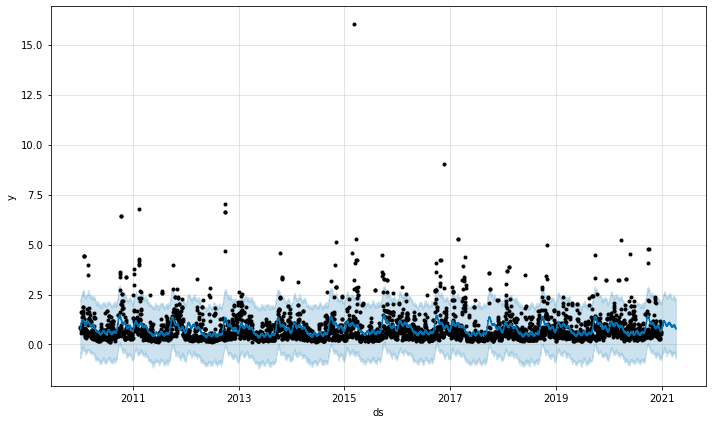

In [15]:
plot1 = m.plot(forecast)
plt.savefig('images/TimeSeries-chl_daily-2010-2020.png', dpi=100)

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


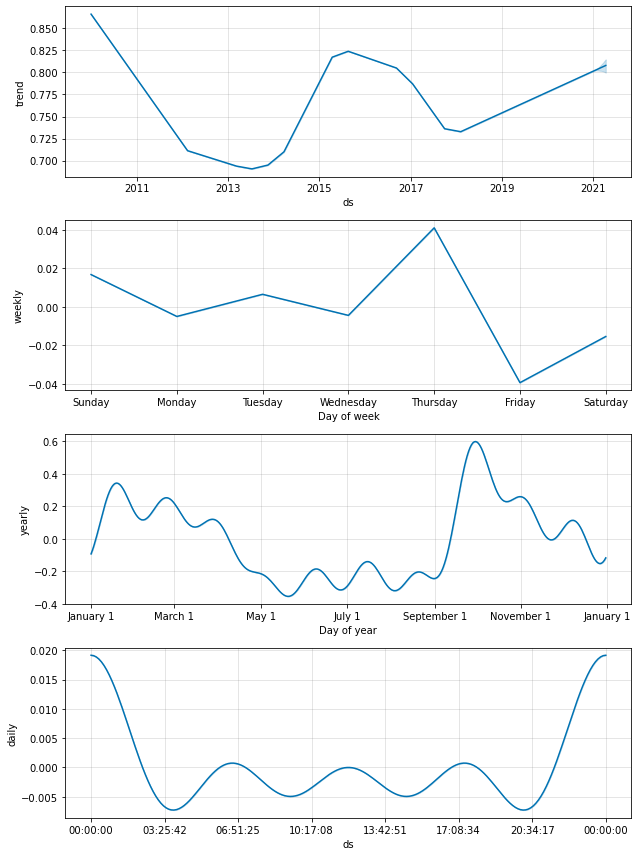

In [16]:
plt2 = m.plot_components(forecast)
plt.savefig('images/daily-components_2010-2020.png', dpi=100)

#### Second Model: enabling yearly seasonality

In [10]:
# Train Model
m2 = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True) # confidence interval of 95%
model2 = m2.fit(df) # fit method

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:
# Forecast
future2 = m2.make_future_dataframe(periods=100,freq='D')
forecast2 = m2.predict(future)
forecast2.head()

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,0.866176,-0.680014,2.173116,0.866176,0.866176,-0.117409,-0.117409,-0.117409,0.019169,...,-0.039375,-0.039375,-0.039375,-0.097202,-0.097202,-0.097202,0.0,0.0,0.0,0.748767
1,2010-01-02,0.865975,-0.577811,2.234197,0.865975,0.865975,-0.070726,-0.070726,-0.070726,0.019169,...,-0.015407,-0.015407,-0.015407,-0.074487,-0.074487,-0.074487,0.0,0.0,0.0,0.795249
2,2010-01-03,0.865774,-0.544990,2.336432,0.865774,0.865774,-0.012621,-0.012621,-0.012621,0.019169,...,0.016740,0.016740,0.016740,-0.048529,-0.048529,-0.048529,0.0,0.0,0.0,0.853153
3,2010-01-04,0.865573,-0.591701,2.372388,0.865573,0.865573,-0.005640,-0.005640,-0.005640,0.019169,...,-0.005005,-0.005005,-0.005005,-0.019803,-0.019803,-0.019803,0.0,0.0,0.0,0.859933
4,2010-01-05,0.865372,-0.508059,2.284075,0.865372,0.865372,0.036816,0.036816,0.036816,0.019169,...,0.006499,0.006499,0.006499,0.011148,0.011148,0.011148,0.0,0.0,0.0,0.902188


In [12]:
forecast2.tail(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4068,2021-02-20,0.804753,-0.355670,2.369186,0.803247,0.807402,0.245551,0.245551,0.245551,0.019169,...,-0.015407,-0.015407,-0.015407,0.241790,0.241790,0.241790,0.0,0.0,0.0,1.050304
4069,2021-02-21,0.804818,-0.241461,2.447896,0.803251,0.807550,0.283855,0.283855,0.283855,0.019169,...,0.016740,0.016740,0.016740,0.247946,0.247946,0.247946,0.0,0.0,0.0,1.088672
4070,2021-02-22,0.804882,-0.413553,2.456071,0.803269,0.807697,0.266127,0.266127,0.266127,0.019169,...,-0.005005,-0.005005,-0.005005,0.251963,0.251963,0.251963,0.0,0.0,0.0,1.071009
4071,2021-02-23,0.804947,-0.294989,2.418480,0.803282,0.807830,0.279374,0.279374,0.279374,0.019169,...,0.006499,0.006499,0.006499,0.253706,0.253706,0.253706,0.0,0.0,0.0,1.084321
4072,2021-02-24,0.805012,-0.371070,2.475857,0.803274,0.807962,0.267829,0.267829,0.267829,0.019169,...,-0.004448,-0.004448,-0.004448,0.253109,0.253109,0.253109,0.0,0.0,0.0,1.072841
4073,2021-02-25,0.805077,-0.296939,2.676322,0.803234,0.808093,0.310341,0.310341,0.310341,0.019169,...,0.040997,0.040997,0.040997,0.250176,0.250176,0.250176,0.0,0.0,0.0,1.115418
4074,2021-02-26,0.805142,-0.289497,2.483658,0.803193,0.808235,0.224777,0.224777,0.224777,0.019169,...,-0.039375,-0.039375,-0.039375,0.244984,0.244984,0.244984,0.0,0.0,0.0,1.029919
4075,2021-02-27,0.805206,-0.312324,2.447804,0.803206,0.808377,0.241434,0.241434,0.241434,0.019169,...,-0.015407,-0.015407,-0.015407,0.237672,0.237672,0.237672,0.0,0.0,0.0,1.046640
4076,2021-02-28,0.805271,-0.384300,2.528389,0.803153,0.808546,0.264353,0.264353,0.264353,0.019169,...,0.016740,0.016740,0.016740,0.228444,0.228444,0.228444,0.0,0.0,0.0,1.069624
4077,2021-03-01,0.805336,-0.417338,2.403428,0.803174,0.808730,0.231717,0.231717,0.231717,0.019169,...,-0.005005,-0.005005,-0.005005,0.217554,0.217554,0.217554,0.0,0.0,0.0,1.037053


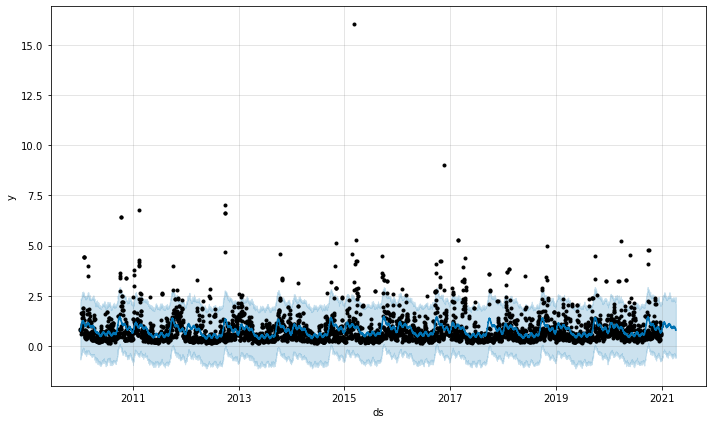

In [13]:
plotm2 = m2.plot(forecast2)

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


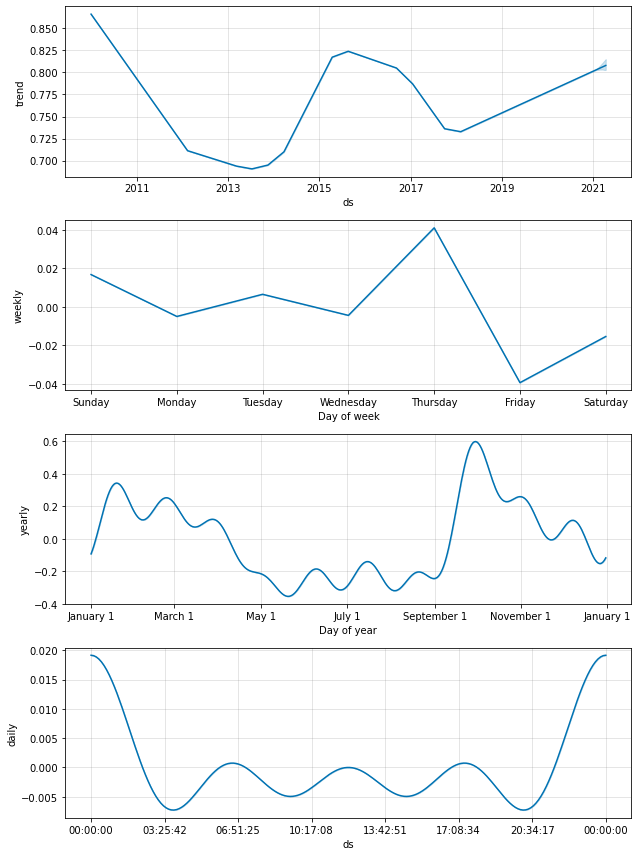

In [14]:
pltm2 = m2.plot_components(forecast2)